# **Name:** \_\_\_\_\_

**EID:** \_\_\_\_\_

**Kaggle Competition:** \_\_\_\_

**Team Name:** \_\_\_\_\_


# CS5489 - Course Project

Due date: May 4, 11:59pm

## Goal

For the course project, select one of the following competitions on Kaggle:

### [Plant Pathology 2020 - FGVC7](https://www.kaggle.com/c/plant-pathology-2020-fgvc7/overview): Identify the category of foliar diseases in apple trees

> Misdiagnosis of the many diseases impacting agricultural crops can lead to misuse of chemicals leading to the emergence of resistant pathogen strains, increased input costs, and more outbreaks with significant economic loss and environmental impacts. Current disease diagnosis based on human scouting is time-consuming and expensive, and although computer-vision based models have the promise to increase efficiency, the great variance in symptoms due to age of infected tissues, genetic variations, and light conditions within trees decreases the accuracy of detection.
>
> Objectives of ‘Plant Pathology Challenge’ are to train a model using images of training dataset to 1) Accurately classify a given image from testing dataset into different diseased category or a healthy leaf; 2) Accurately distinguish between many diseases, sometimes more than one on a single leaf; 3) Deal with rare classes and novel symptoms; 4) Address depth perception—angle, light, shade, physiological age of the leaf; and 5) Incorporate expert knowledge in identification, annotation, quantification, and guiding computer vision to search for relevant features during learning.

### [University of Liverpool - Ion Switching](https://www.kaggle.com/c/liverpool-ion-switching/overview): Identify the number of channels open at each time point

>Think you can use your data science skills to make big predictions at a submicroscopic level?
>
>Many diseases, including cancer, are believed to have a contributing factor in common. Ion channels are pore-forming proteins present in animals and plants. They encode learning and memory, help fight infections, enable pain signals, and stimulate muscle contraction. If scientists could better study ion channels, which may be possible with the aid of machine learning, it could have a far-reaching impact.
>
>When ion channels open, they pass electric currents. Existing methods of detecting these state changes are slow and laborious. Humans must supervise the analysis, which imparts considerable bias, in addition to being tedious. These difficulties limit the volume of ion channel current analysis that can be used in research. Scientists hope that technology could enable rapid automatic detection of ion channel current events in raw data.
>
>The University of Liverpool’s Institute of Ageing and Chronic Disease is working to advance ion channel research. Their team of scientists have asked for your help. In this competition, you’ll use ion channel data to better model automatic identification methods. If successful, you’ll be able to detect individual ion channel events in noisy raw signals. The data is simulated and injected with real world noise to emulate what scientists observe in laboratory experiments.
>
>Technology to analyze electrical data in cells has not changed significantly over the past 20 years. If we better understand ion channel activity, the research could impact many areas related to cell health and migration. From human diseases to how climate change affects plants, faster detection of ion channels could greatly accelerate solutions to major world problems.

### [Jigsaw Multilingual Toxic Comment Classification](https://www.kaggle.com/c/jigsaw-multilingual-toxic-comment-classification): Use TPUs to identify toxicity comments across multiple languages

>It only takes one toxic comment to sour an online discussion. The Conversation AI team, a research initiative founded by Jigsaw and Google, builds technology to protect voices in conversation. A main area of focus is machine learning models that can identify toxicity in online conversations, where toxicity is defined as anything rude, disrespectful or otherwise likely to make someone leave a discussion. If these toxic contributions can be identified, we could have a safer, more collaborative internet.
>
>In the previous 2018 Toxic Comment Classification Challenge, Kagglers built multi-headed models to recognize toxicity and several subtypes of toxicity. In 2019, in the Unintended Bias in Toxicity Classification Challenge, you worked to build toxicity models that operate fairly across a diverse range of conversations. This year, we're taking advantage of Kaggle's new TPU support and challenging you to build multilingual models with English-only training data.
>
>Jigsaw's API, Perspective, serves toxicity models and others in a growing set of languages (see our documentation for the full list). Over the past year, the field has seen impressive multilingual capabilities from the latest model innovations, including few- and zero-shot learning. We're excited to learn whether these results "translate" (pun intended!) to toxicity classification. Your training data will be the English data provided for our previous two competitions and your test data will be Wikipedia talk page comments in several different languages.
>
>As our computing resources and modeling capabilities grow, so does our potential to support healthy conversations across the globe. Develop strategies to build effective multilingual models and you'll help Conversation AI and the entire industry realize that potential.


## Groups
Group projects should contain 2 students.  To sign up for a group, go to Canvas and under "People", join one of the existing "Project Groups".  _For group projects, the project report must state the percentage contribution from each project member._

## Methodology
You are free to choose the methodology to solve the task.  In machine learning, it is important to use domain knowledge to help solve the problem.  Hence, instead of blindly applying the algorithms to the data you need to think about how to represent the data in a way that makes sense for the algorithm to solve the task. 


## Evaluation on Kaggle

The final evaluation will be performed on Kaggle.

## Project Presentation

Each project group needs to give a presentation at the end of the semester.  The presentation time is 8 minutes.  You _must_ give a presentation.

## What to hand in

You need to turn in the following things:

1. This ipynb file `CourseProject-2020.ipynb` with your source code and documentation. You should write about all the various attempts that you make to find a good solution.
2. Your final submission file to Kaggle.
3. The ipynb file `CourseProject-2018-final.ipynb`, which contains the code that generates the final submission file that you submit to Kaggle. This code will be used to verify that your Kaggle submission is reproducible.
4. Presentation slides.

Files should be uploaded to "Course Project" on Canvas.


## Grading
The marks of the assignment are distributed as follows:
- 40% - Results using various feature representations, dimensionality reduction methods, classifiers, etc.
- 25% - Trying out feature representations (e.g. adding additional features, combining features from different sources) or methods not used in the tutorials.
- 15% - Quality of the written report.  More points for insightful observations and analysis.
- 15% - Project presentation
- 5% - Final ranking on the Kaggle test data (private leaderboard).

**Late Penalty:** 25 marks will be subtracted for each day late.
<hr>

# YOUR METHODS HERE

In [107]:
import numpy as np
import scipy as sp
import pandas as pd

import albumentations as A
import cv2

from sklearn.model_selection import train_test_split

from tqdm import tqdm

tqdm.pandas()
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
pyo.init_notebook_mode()

np.random.seed(2020)
# tf.random.set_seed(2020)

import warnings
warnings.filterwarnings("ignore")

## 1. Loading Data and Pre-processing

In [86]:
IMAGE_PATH = "./dataset/images/"
TEST_PATH = "./dataset/test.csv"
TRAIN_PATH = "./dataset/train.csv"
SUB_PATH = "./dataset/sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)

In [87]:
print(len(train_data))
train_data.head()

1821


image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [88]:
print(len(test_data))
test_data.head()

1821


image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

In [89]:
train_paths = train_data.image_id.values
test_paths = test_data.image_id.values

# split training and valid dataset
train_labels = np.float32(train_data.loc[:, 'healthy':'scab'].values)
train_paths, valid_paths, train_labels, valid_labels = \
    train_test_split(train_paths, train_labels, test_size=0.15, random_state=2020)

### Visualize sample leaves

In [90]:
classes = ['healthy', 'multiple_diseases', 'rust', 'scab']
def get_tages(labels):
    tags = []
    for label in labels:
        tag = [classes[i] for i in range(4) if label[i] == 1]
        tags.append(tag)
    return tags

train_tags = get_tages(train_labels)
val_tags = get_tages(valid_labels)

In [91]:
def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(IMAGE_PATH + file_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

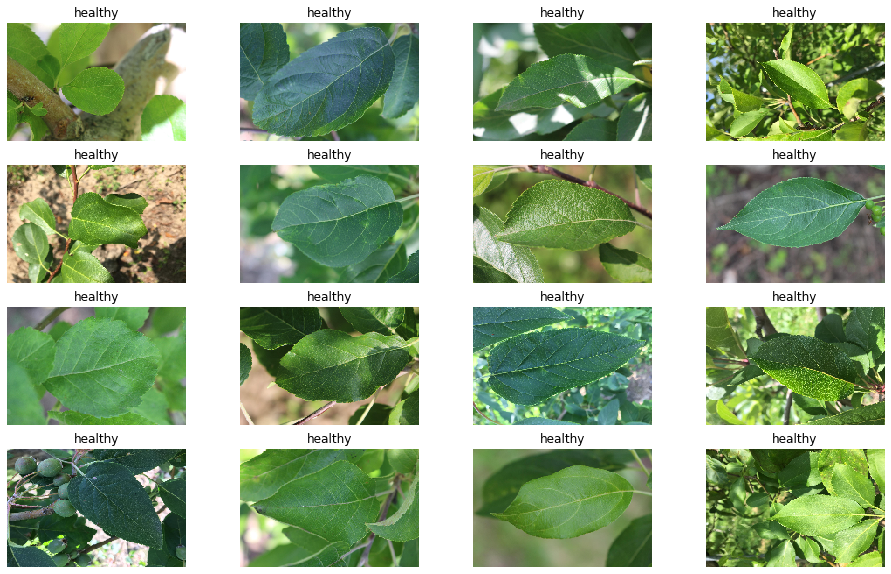

In [92]:
def show_samples(c='healthy'):
    plt.figure(figsize=(16,10))
    num = 0
    for i in range(len(train_paths)):
        if c not in train_tags[i]:
            continue
#         print
        plt.subplot(4, 4, num+1)
        plt.imshow(cv2.resize(load_image(train_paths[i]), (205, 136))) 
        plt.title(' '.join(train_tags[i]))
        plt.axis('off')
        num += 1
        if num == 16:
            break
    plt.show()

show_samples(c='healthy')

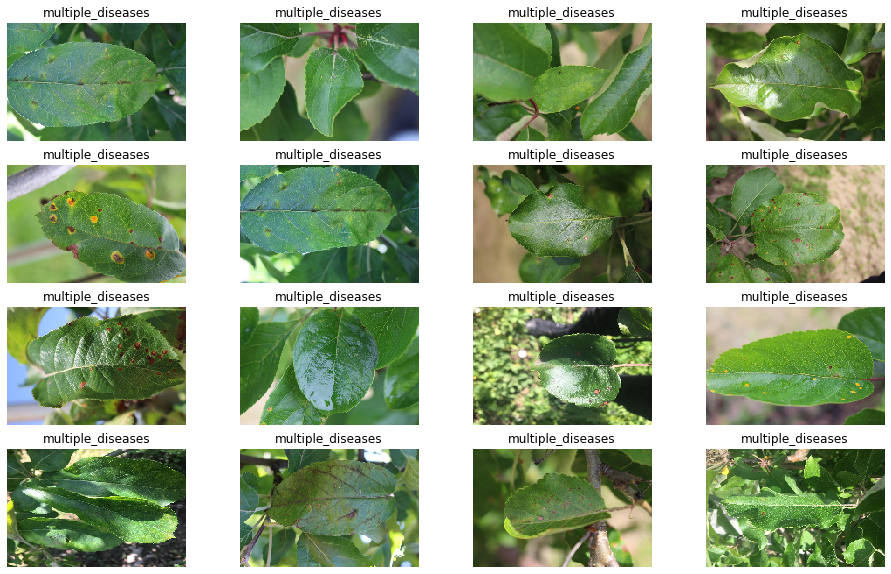

In [93]:
show_samples(c='multiple_diseases')

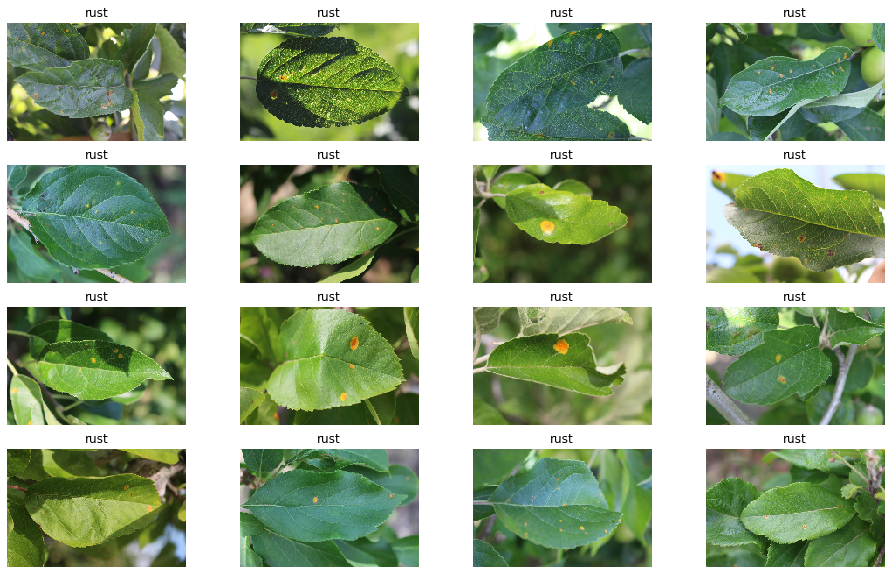

In [94]:
show_samples(c = 'rust')

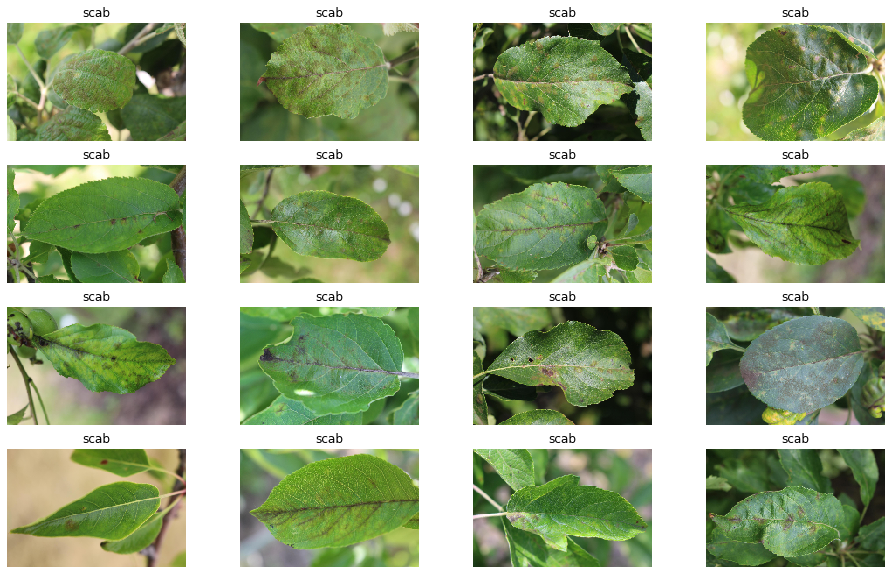

In [95]:
show_samples(c = 'scab')

### Visualize targets

#### Parallel Category Diagram

In [108]:
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]
fig = px.parallel_categories(train_data[["healthy", "scab", "rust", "multiple_diseases"]], 
                             color="healthy", 
                             color_continuous_scale=colorscale,
                             title="Parallel categories plot of targets")
fig

#### Show tags portion

In [109]:
tagnames, tagnames_counts = np.unique(np.concatenate(train_tags), return_counts=True)
for a, b in zip(tagnames, tagnames_counts): 
    print("{}: {}".format(a, b))


fig = go.Figure([go.Pie(labels=train_data.columns[1:],
           values=train_data.iloc[:, 1:].sum().values)])
fig.show()

healthy: 440
multiple_diseases: 78
rust: 531
scab: 498


## Reference 

[TensorFlow: Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)